In [78]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import os
import glob
import pandas as pd




In [79]:
path = "C:/Users/jaing5/Desktop/upwork/project_dennis/CAD_CHF/"

In [80]:
os.chdir(path)

In [81]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [82]:
all_filenames

['CADCHF.CSV']

In [83]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [84]:
df = combined_csv

In [85]:
df

,Date,Open,High,Low,Close
0,1/2/1998,1.0227,1.0310,1.0210,1.0301
1,1/5/1998,1.0294,1.0424,1.0234,1.0407
2,1/6/1998,1.0410,1.0440,1.0303,1.0339
3,1/7/1998,1.0335,1.0384,1.0286,1.0340
4,1/8/1998,1.0342,1.0349,1.0259,1.0298
...,...,...,...,...,...
5605,4/13/2020,0.6927,0.6980,0.6891,0.6964
5606,4/14/2020,0.6956,0.6971,0.6896,0.6915
5607,4/15/2020,0.6915,0.6921,0.6826,0.6841
5608,4/16/2020,0.6832,0.6879,0.6831,0.6868


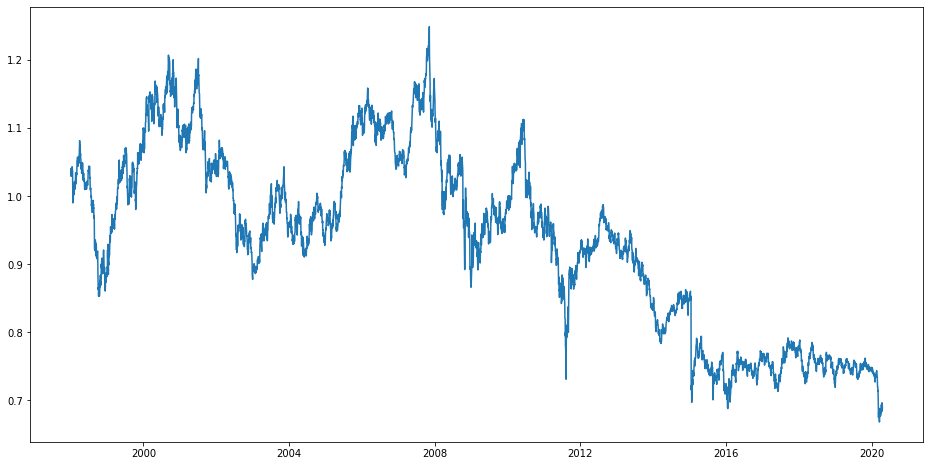

In [86]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [87]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
73s - loss: 0.0054


In [72]:
X_test

array([[[0.25400014],
        [0.255524  ],
        [0.25192214],
        ...,
        [0.2569786 ],
        [0.25822539],
        [0.25961072]],

       [[0.255524  ],
        [0.25192214],
        [0.25067535],
        ...,
        [0.25822539],
        [0.25961072],
        [0.25836393]],

       [[0.25192214],
        [0.25067535],
        [0.25344601],
        ...,
        [0.25961072],
        [0.25836393],
        [0.2561474 ]],

       ...,

       [[0.18161668],
        [0.18895892],
        [0.18452587],
        ...,
        [0.12613424],
        [0.12315578],
        [0.1270347 ]],

       [[0.18895892],
        [0.18452587],
        [0.17891529],
        ...,
        [0.12315578],
        [0.1270347 ],
        [0.12232458]],

       [[0.18452587],
        [0.17891529],
        [0.17406663],
        ...,
        [0.1270347 ],
        [0.12232458],
        [0.11851493]]])

In [73]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

3.268341909508072

C:\Users\jaing5\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


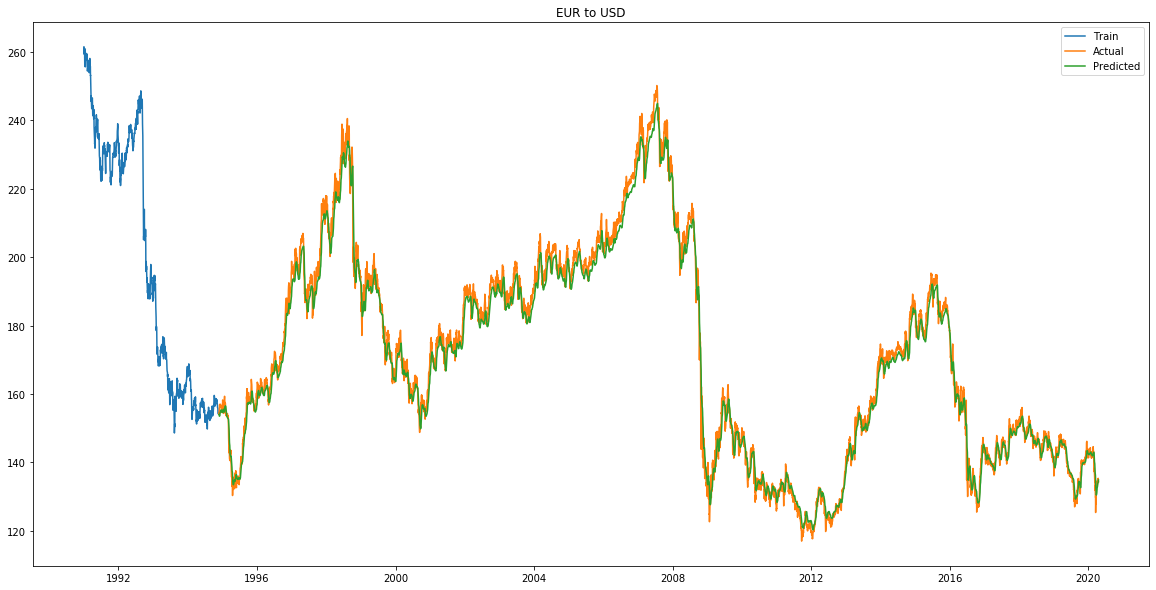

In [74]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
plt.title("EUR to USD")
valid['Predictions'] = closing_price
plt.plot(train['Close'], label = 'Train')
plt.plot(valid[['Close']], label = 'Actual')
plt.plot(valid[['Predictions']], label = 'Predicted')
plt.legend()

In [75]:
valid

,Close,Predictions
Date,,
1994-11-25,154.32,153.998306
1994-11-28,154,153.821045
1994-11-29,154.56,153.660324
1994-11-30,154.69,153.555191
1994-12-01,155.54,153.499878
...,...,...
2020-04-13,134.8,134.179474
2020-04-14,135.36,134.408264
2020-04-15,134.68,134.626587


In [76]:
train

,Close
Date,
1991-01-02,261.39
1991-01-03,259.4
1991-01-04,261
1991-01-07,259.41
1991-01-08,259.18
...,...
1994-11-17,154.5
1994-11-18,154.33
1994-11-21,154.12


In [77]:
valid.to_csv('PredictionResults_LSTM_Last60_GBP_JPY.csv')

In [25]:
model.save("model_lstm_last60.h5")